<a href="https://colab.research.google.com/github/sujal7070/localrepo/blob/main/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## **Introduction to Colab and Python**

Dataset shape: (535, 2)

Label distribution:
label
1    277
0    258
Name: count, dtype: int64

Sample preprocessed messages:
Original: WINNER!! You have won a $1000 prize. Call now to c...
Processed: winner prize call claim...

Original: Free entry in a weekly competition to win an iPhon...
Processed: free entri weekli competit win iphon...

Original: Congratulations! You've been selected for a free v...
Processed: congratul youv select free vacat...

Feature matrix shape: (535, 115)
Training samples: 428
Testing samples: 107

MODEL TRAINING & EVALUATION

Naive Bayes:
  Accuracy:  100.00%
  Precision: 100.00%
  Recall:    100.00%
  F1 Score:  100.00%

SVM:
  Accuracy:  100.00%
  Precision: 100.00%
  Recall:    100.00%
  F1 Score:  100.00%

Random Forest:
  Accuracy:  100.00%
  Precision: 100.00%
  Recall:    100.00%
  F1 Score:  100.00%

Logistic Regression:
  Accuracy:  100.00%
  Precision: 100.00%
  Recall:    100.00%
  F1 Score:  100.00%

MODEL COMPARISON
              Model  Accur

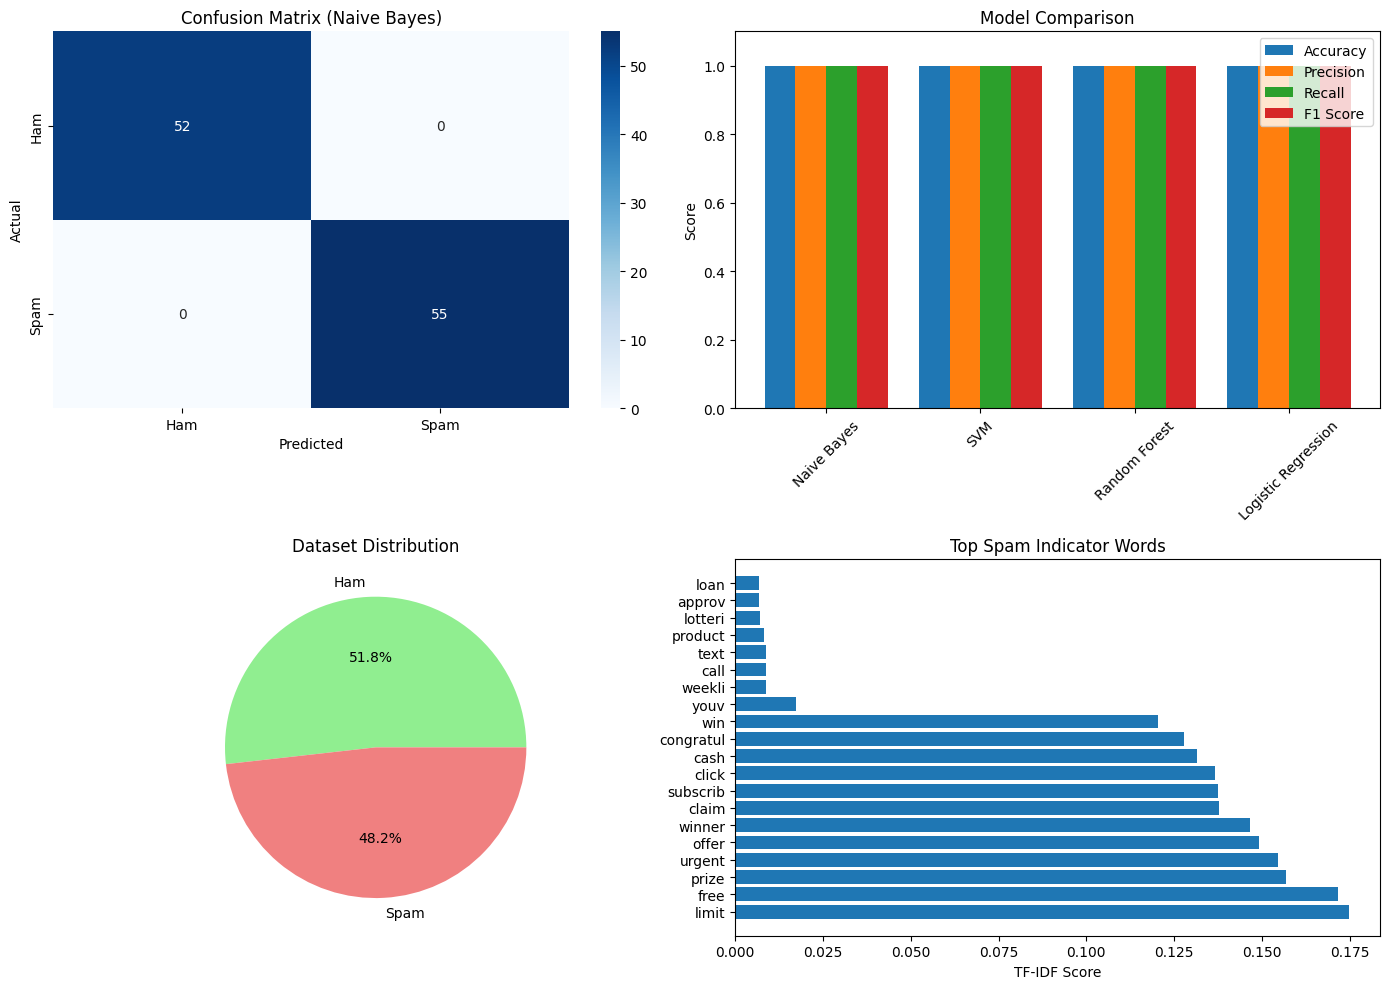


Visualization saved!


In [2]:
# ============================================
# PROJECT 5: SPAM EMAIL DETECTION
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data
nltk.download('stopwords', quiet=True)

# --------------------------
# 1. CREATE SAMPLE DATASET
# --------------------------

# Sample spam dataset
data = {
    'message': [
        # Spam messages
        "WINNER!! You have won a $1000 prize. Call now to claim!",
        "Free entry in a weekly competition to win an iPhone!",
        "Congratulations! You've been selected for a free vacation!",
        "URGENT: Your account has been compromised. Click here to verify.",
        "You have won £1000 cash! Text WIN to 12345",
        "Free ringtone! Reply to download now",
        "Get rich quick! Make $5000 weekly from home",
        "Hot singles in your area! Click to meet them now",
        "You've won a lottery prize of $500,000!",
        "Claim your free gift card worth $200",
        "Limited time offer: 90% off all products!",
        "Your loan has been approved. Call now!",
        "Win a brand new car! Enter now for free!",
        "URGENT: Payment required or legal action will be taken",
        "Congratulations winner! You've won our grand prize",
        # Ham messages
        "Hey, are you coming to the party tonight?",
        "Can we meet for lunch tomorrow?",
        "Thanks for your help with the project",
        "I'll be there in 10 minutes",
        "Don't forget to pick up groceries on your way home",
        "Happy birthday! Have a great day!",
        "The meeting has been rescheduled to 3 PM",
        "Can you send me the report by end of day?",
        "Let's catch up over coffee sometime",
        "I'm running late, start without me",
        "Great job on the presentation today!",
        "Please review the attached document",
        "What time should I pick you up?",
        "The kids are doing well at school",
        "Looking forward to seeing you this weekend",
        "Can you call me when you're free?",
        "I'll send you the details later",
        "Thanks for dinner last night, it was lovely",
        "Remember to take your medicine",
        "The package was delivered today",
    ],
    'label': [1]*15 + [0]*20  # 1 = spam, 0 = ham
}

# Expand dataset
np.random.seed(42)
expanded_data = {'message': [], 'label': []}

spam_words = ['free', 'win', 'winner', 'cash', 'prize', 'claim', 'urgent',
              'congratulations', 'offer', 'limited', 'click', 'subscribe']
ham_words = ['meeting', 'project', 'lunch', 'dinner', 'thanks', 'please',
             'tomorrow', 'today', 'work', 'home', 'call', 'time']

for _ in range(500):
    if np.random.random() > 0.5:
        # Generate spam-like message
        words = np.random.choice(spam_words, 5)
        msg = ' '.join(words) + ' ' + str(np.random.randint(100, 9999))
        expanded_data['message'].append(msg)
        expanded_data['label'].append(1)
    else:
        # Generate ham-like message
        words = np.random.choice(ham_words, 4)
        msg = ' '.join(words)
        expanded_data['message'].append(msg)
        expanded_data['label'].append(0)

# Combine original and expanded data
data['message'].extend(expanded_data['message'])
data['label'].extend(expanded_data['label'])

df = pd.DataFrame(data)
print(f"Dataset shape: {df.shape}")
print(f"\nLabel distribution:")
print(df['label'].value_counts())

# --------------------------
# 2. TEXT PREPROCESSING
# --------------------------

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Clean and preprocess text"""
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize and remove stopwords
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]

    return ' '.join(words)

# Apply preprocessing
df['processed_message'] = df['message'].apply(preprocess_text)

print("\nSample preprocessed messages:")
for i in range(3):
    print(f"Original: {df['message'].iloc[i][:50]}...")
    print(f"Processed: {df['processed_message'].iloc[i][:50]}...")
    print()

# --------------------------
# 3. FEATURE EXTRACTION
# --------------------------

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['processed_message'])
y = df['label']

print(f"Feature matrix shape: {X.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# --------------------------
# 4. BUILD & TRAIN MODELS
# --------------------------

print("\n" + "="*50)
print("MODEL TRAINING & EVALUATION")
print("="*50)

models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

results = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Cross validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'CV Mean': cv_scores.mean()
    })

    print(f"\n{name}:")
    print(f"  Accuracy:  {accuracy*100:.2f}%")
    print(f"  Precision: {precision*100:.2f}%")
    print(f"  Recall:    {recall*100:.2f}%")
    print(f"  F1 Score:  {f1*100:.2f}%")

results_df = pd.DataFrame(results)
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
print(results_df.to_string(index=False))

# --------------------------
# 5. BEST MODEL SELECTION
# --------------------------

best_model = models['Naive Bayes']  # Usually best for text classification

# --------------------------
# 6. PREDICTION FUNCTION
# --------------------------

def predict_spam(message):
    """Predict if a message is spam or not"""
    # Preprocess
    processed = preprocess_text(message)

    # Vectorize
    vectorized = tfidf_vectorizer.transform([processed])

    # Predict
    prediction = best_model.predict(vectorized)[0]
    probability = best_model.predict_proba(vectorized)[0]

    result = "SPAM" if prediction == 1 else "NOT SPAM"
    confidence = probability[prediction] * 100

    return result, confidence

# Test predictions
print("\n" + "="*50)
print("SPAM DETECTION EXAMPLES")
print("="*50)

test_messages = [
    "Congratulations! You've won a free iPhone! Click here to claim now!",
    "Hey, can we meet for coffee tomorrow at 10am?",
    "URGENT: Your bank account needs verification. Act now!",
    "Thanks for your email. I'll get back to you soon.",
    "Free entry to win $10000! Reply WIN to participate!",
    "Don't forget about mom's birthday party this weekend."
]

for msg in test_messages:
    result, confidence = predict_spam(msg)
    print(f"\nMessage: {msg[:50]}...")
    print(f"Result: {result} (Confidence: {confidence:.2f}%)")

# --------------------------
# 7. VISUALIZATION
# --------------------------

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Confusion Matrix
ax1 = axes[0, 0]
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
ax1.set_title('Confusion Matrix (Naive Bayes)')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Model Comparison
ax2 = axes[0, 1]
x = np.arange(len(results_df))
width = 0.2
ax2.bar(x - width*1.5, results_df['Accuracy'], width, label='Accuracy')
ax2.bar(x - width/2, results_df['Precision'], width, label='Precision')
ax2.bar(x + width/2, results_df['Recall'], width, label='Recall')
ax2.bar(x + width*1.5, results_df['F1 Score'], width, label='F1 Score')
ax2.set_xticks(x)
ax2.set_xticklabels(results_df['Model'], rotation=45)
ax2.set_ylabel('Score')
ax2.set_title('Model Comparison')
ax2.legend()
ax2.set_ylim(0, 1.1)

# Label Distribution
ax3 = axes[1, 0]
label_counts = df['label'].value_counts()
ax3.pie(label_counts, labels=['Ham', 'Spam'], autopct='%1.1f%%',
        colors=['lightgreen', 'lightcoral'])
ax3.set_title('Dataset Distribution')

# Word Cloud placeholder (simplified)
ax4 = axes[1, 1]
feature_names = tfidf_vectorizer.get_feature_names_out()
spam_indices = df[df['label'] == 1].index[:100]
spam_features = X[spam_indices].toarray().mean(axis=0)
top_indices = spam_features.argsort()[-20:]
top_words = [(feature_names[i], spam_features[i]) for i in top_indices]
top_words = sorted(top_words, key=lambda x: x[1], reverse=True)

words, scores = zip(*top_words)
ax4.barh(range(len(words)), scores)
ax4.set_yticks(range(len(words)))
ax4.set_yticklabels(words)
ax4.set_xlabel('TF-IDF Score')
ax4.set_title('Top Spam Indicator Words')

plt.tight_layout()
plt.savefig('spam_detection_results.png', dpi=300)
plt.show()

print("\nVisualization saved!")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data
nltk.download('stopwords', quiet=True)

True

In [5]:
# Sample spam dataset
data = {
    'message': [
        # Spam messages
        "WINNER!! You have won a $1000 prize. Call now to claim!",
        "Free entry in a weekly competition to win an iPhone!",
        "Congratulations! You've been selected for a free vacation!",
        "URGENT: Your account has been compromised. Click here to verify.",
        "You have won £1000 cash! Text WIN to 12345",
        "Free ringtone! Reply to download now",
        "Get rich quick! Make $5000 weekly from home",
        "Hot singles in your area! Click to meet them now",
        "You've won a lottery prize of $500,000!",
        "Claim your free gift card worth $200",
        "Limited time offer: 90% off all products!",
        "Your loan has been approved. Call now!",
        "Win a brand new car! Enter now for free!",
        "URGENT: Payment required or legal action will be taken",
        "Congratulations winner! You've won our grand prize",
        # Ham messages
        "Hey, are you coming to the party tonight?",
        "Can we meet for lunch tomorrow?",
        "Thanks for your help with the project",
        "I'll be there in 10 minutes",
        "Don't forget to pick up groceries on your way home",
        "Happy birthday! Have a great day!",
        "The meeting has been rescheduled to 3 PM",
        "Can you send me the report by end of day?",
        "Let's catch up over coffee sometime",
        "I'm running late, start without me",
        "Great job on the presentation today!",
        "Please review the attached document",
        "What time should I pick you up?",
        "The kids are doing well at school",
        "Looking forward to seeing you this weekend",
        "Can you call me when you're free?",
        "I'll send you the details later",
        "Thanks for dinner last night, it was lovely",
        "Remember to take your medicine",
        "The package was delivered today",
    ],
    'label': [1]*15 + [0]*20  # 1 = spam, 0 = ham
}

# Expand dataset
np.random.seed(42)
expanded_data = {'message': [], 'label': []}

spam_words = ['free', 'win', 'winner', 'cash', 'prize', 'claim', 'urgent',
              'congratulations', 'offer', 'limited', 'click', 'subscribe']
ham_words = ['meeting', 'project', 'lunch', 'dinner', 'thanks', 'please',
             'tomorrow', 'today', 'work', 'home', 'call', 'time']

for _ in range(500):
    if np.random.random() > 0.5:
        # Generate spam-like message
        words = np.random.choice(spam_words, 5)
        msg = ' '.join(words) + ' ' + str(np.random.randint(100, 9999))
        expanded_data['message'].append(msg)
        expanded_data['label'].append(1)
    else:
        # Generate ham-like message
        words = np.random.choice(ham_words, 4)
        msg = ' '.join(words)
        expanded_data['message'].append(msg)
        expanded_data['label'].append(0)

# Combine original and expanded data
data['message'].extend(expanded_data['message'])
data['label'].extend(expanded_data['label'])

df = pd.DataFrame(data)
print(f"Dataset shape: {df.shape}")
print(f"\nLabel distribution:")
print(df['label'].value_counts())


Dataset shape: (535, 2)

Label distribution:
label
1    277
0    258
Name: count, dtype: int64


In [6]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Clean and preprocess text"""
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize and remove stopwords
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]

    return ' '.join(words)

# Apply preprocessing
df['processed_message'] = df['message'].apply(preprocess_text)

print("\nSample preprocessed messages:")
for i in range(3):
    print(f"Original: {df['message'].iloc[i][:50]}...")
    print(f"Processed: {df['processed_message'].iloc[i][:50]}...")
    print()



Sample preprocessed messages:
Original: WINNER!! You have won a $1000 prize. Call now to c...
Processed: winner prize call claim...

Original: Free entry in a weekly competition to win an iPhon...
Processed: free entri weekli competit win iphon...

Original: Congratulations! You've been selected for a free v...
Processed: congratul youv select free vacat...



In [7]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['processed_message'])
y = df['label']

print(f"Feature matrix shape: {X.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Feature matrix shape: (535, 115)
Training samples: 428
Testing samples: 107


In [8]:
print("\n" + "="*50)
print("MODEL TRAINING & EVALUATION")
print("="*50)

models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

results = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Cross validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'CV Mean': cv_scores.mean()
    })

    print(f"\n{name}:")
    print(f"  Accuracy:  {accuracy*100:.2f}%")
    print(f"  Precision: {precision*100:.2f}%")
    print(f"  Recall:    {recall*100:.2f}%")
    print(f"  F1 Score:  {f1*100:.2f}%")

results_df = pd.DataFrame(results)
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
print(results_df.to_string(index=False))



MODEL TRAINING & EVALUATION

Naive Bayes:
  Accuracy:  100.00%
  Precision: 100.00%
  Recall:    100.00%
  F1 Score:  100.00%

SVM:
  Accuracy:  100.00%
  Precision: 100.00%
  Recall:    100.00%
  F1 Score:  100.00%

Random Forest:
  Accuracy:  100.00%
  Precision: 100.00%
  Recall:    100.00%
  F1 Score:  100.00%

Logistic Regression:
  Accuracy:  100.00%
  Precision: 100.00%
  Recall:    100.00%
  F1 Score:  100.00%

MODEL COMPARISON
              Model  Accuracy  Precision  Recall  F1 Score  CV Mean
        Naive Bayes       1.0        1.0     1.0       1.0 0.990643
                SVM       1.0        1.0     1.0       1.0 0.985910
      Random Forest       1.0        1.0     1.0       1.0 0.988290
Logistic Regression       1.0        1.0     1.0       1.0 0.988263


In [12]:
best_model = models['Naive Bayes']  # Usually best for text classification

In [13]:
def predict_spam(message):
    """Predict if a message is spam or not"""
    # Preprocess
    processed = preprocess_text(message)

    # Vectorize
    vectorized = tfidf_vectorizer.transform([processed])

    # Predict
    prediction = best_model.predict(vectorized)[0]
    probability = best_model.predict_proba(vectorized)[0]

    result = "SPAM" if prediction == 1 else "NOT SPAM"
    confidence = probability[prediction] * 100

    return result, confidence

# Test predictions
print("\n" + "="*50)
print("SPAM DETECTION EXAMPLES")
print("="*50)

test_messages = [
    "Congratulations! You've won a free iPhone! Click here to claim now!",
    "Hey, can we meet for coffee tomorrow at 10am?",
    "URGENT: Your bank account needs verification. Act now!",
    "Thanks for your email. I'll get back to you soon.",
    "Free entry to win $10000! Reply WIN to participate!",
    "Don't forget about mom's birthday party this weekend."
]

for msg in test_messages:
    result, confidence = predict_spam(msg)
    print(f"\nMessage: {msg[:50]}...")
    print(f"Result: {result} (Confidence: {confidence:.2f}%)")


SPAM DETECTION EXAMPLES

Message: Congratulations! You've won a free iPhone! Click h...
Result: SPAM (Confidence: 97.94%)

Message: Hey, can we meet for coffee tomorrow at 10am?...
Result: NOT SPAM (Confidence: 93.14%)

Message: URGENT: Your bank account needs verification. Act ...
Result: SPAM (Confidence: 84.27%)

Message: Thanks for your email. I'll get back to you soon....
Result: NOT SPAM (Confidence: 80.88%)

Message: Free entry to win $10000! Reply WIN to participate...
Result: SPAM (Confidence: 93.43%)

Message: Don't forget about mom's birthday party this weeke...
Result: NOT SPAM (Confidence: 71.05%)


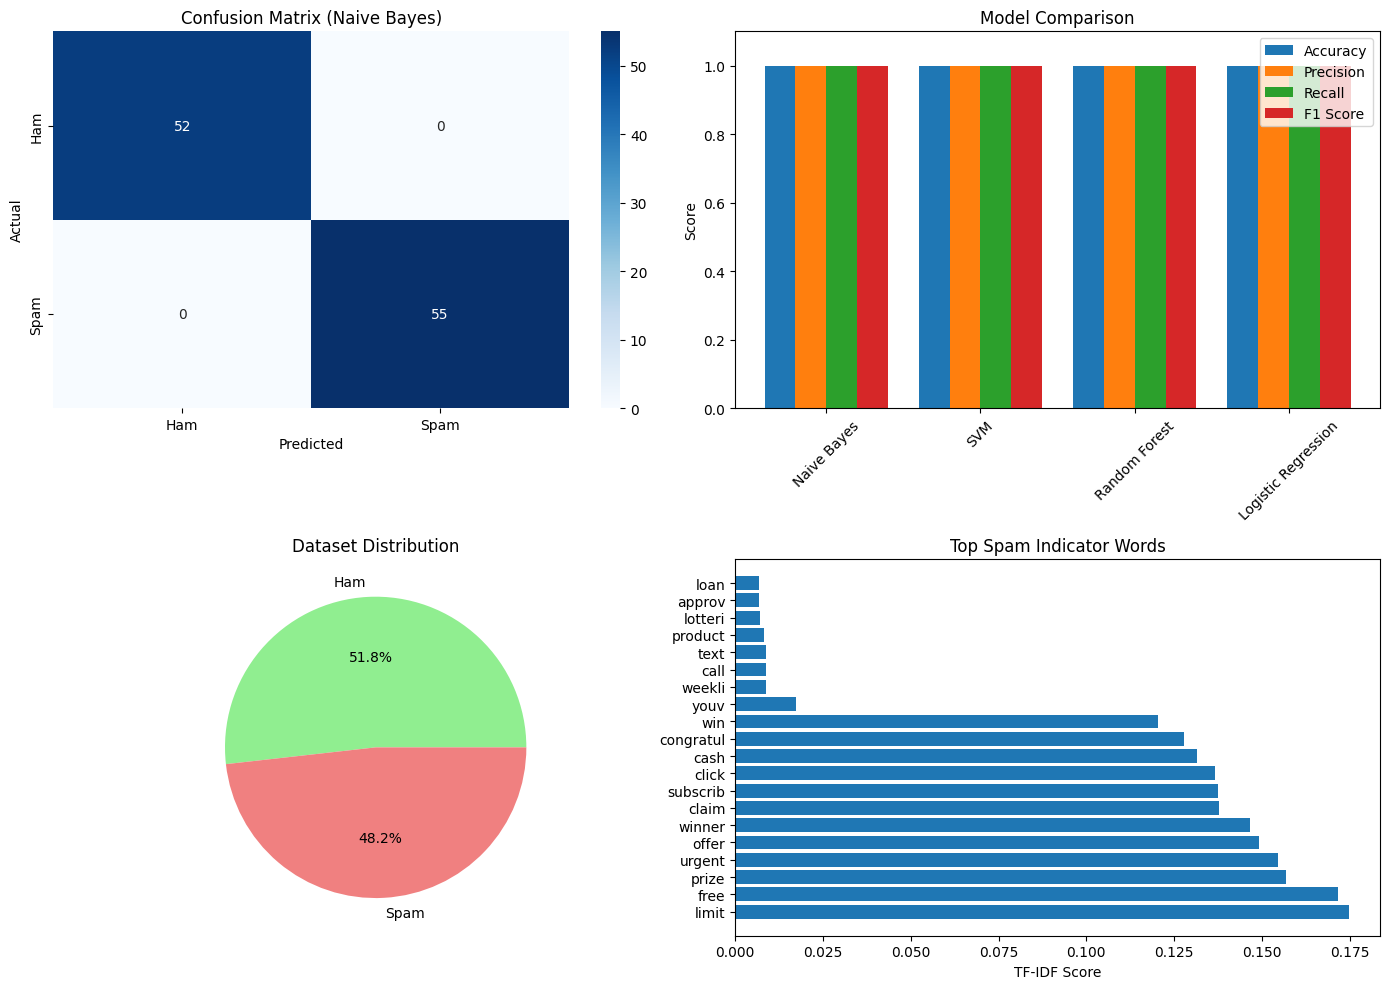


Visualization saved!


In [14]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Confusion Matrix
ax1 = axes[0, 0]
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
ax1.set_title('Confusion Matrix (Naive Bayes)')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Model Comparison
ax2 = axes[0, 1]
x = np.arange(len(results_df))
width = 0.2
ax2.bar(x - width*1.5, results_df['Accuracy'], width, label='Accuracy')
ax2.bar(x - width/2, results_df['Precision'], width, label='Precision')
ax2.bar(x + width/2, results_df['Recall'], width, label='Recall')
ax2.bar(x + width*1.5, results_df['F1 Score'], width, label='F1 Score')
ax2.set_xticks(x)
ax2.set_xticklabels(results_df['Model'], rotation=45)
ax2.set_ylabel('Score')
ax2.set_title('Model Comparison')
ax2.legend()
ax2.set_ylim(0, 1.1)

# Label Distribution
ax3 = axes[1, 0]
label_counts = df['label'].value_counts()
ax3.pie(label_counts, labels=['Ham', 'Spam'], autopct='%1.1f%%',
        colors=['lightgreen', 'lightcoral'])
ax3.set_title('Dataset Distribution')

# Word Cloud placeholder (simplified)
ax4 = axes[1, 1]
feature_names = tfidf_vectorizer.get_feature_names_out()
spam_indices = df[df['label'] == 1].index[:100]
spam_features = X[spam_indices].toarray().mean(axis=0)
top_indices = spam_features.argsort()[-20:]
top_words = [(feature_names[i], spam_features[i]) for i in top_indices]
top_words = sorted(top_words, key=lambda x: x[1], reverse=True)

words, scores = zip(*top_words)
ax4.barh(range(len(words)), scores)
ax4.set_yticks(range(len(words)))
ax4.set_yticklabels(words)
ax4.set_xlabel('TF-IDF Score')
ax4.set_title('Top Spam Indicator Words')

plt.tight_layout()
plt.savefig('spam_detection_results.png', dpi=300)
plt.show()

print("\nVisualization saved!")

Dataset shape: (535, 2)

Label distribution:
label
1    277
0    258
Name: count, dtype: int64

Sample preprocessed messages:
Original: WINNER!! You have won a $1000 prize. Call now to c...
Processed: winner prize call claim...

Original: Free entry in a weekly competition to win an iPhon...
Processed: free entri weekli competit win iphon...

Original: Congratulations! You've been selected for a free v...
Processed: congratul youv select free vacat...

Feature matrix shape: (535, 115)
Training samples: 428
Testing samples: 107

MODEL TRAINING & EVALUATION

Naive Bayes:
  Accuracy:  100.00%
  Precision: 100.00%
  Recall:    100.00%
  F1 Score:  100.00%

SVM:
  Accuracy:  100.00%
  Precision: 100.00%
  Recall:    100.00%
  F1 Score:  100.00%

Random Forest:
  Accuracy:  100.00%
  Precision: 100.00%
  Recall:    100.00%
  F1 Score:  100.00%

Logistic Regression:
  Accuracy:  100.00%
  Precision: 100.00%
  Recall:    100.00%
  F1 Score:  100.00%

MODEL COMPARISON
              Model  Accur

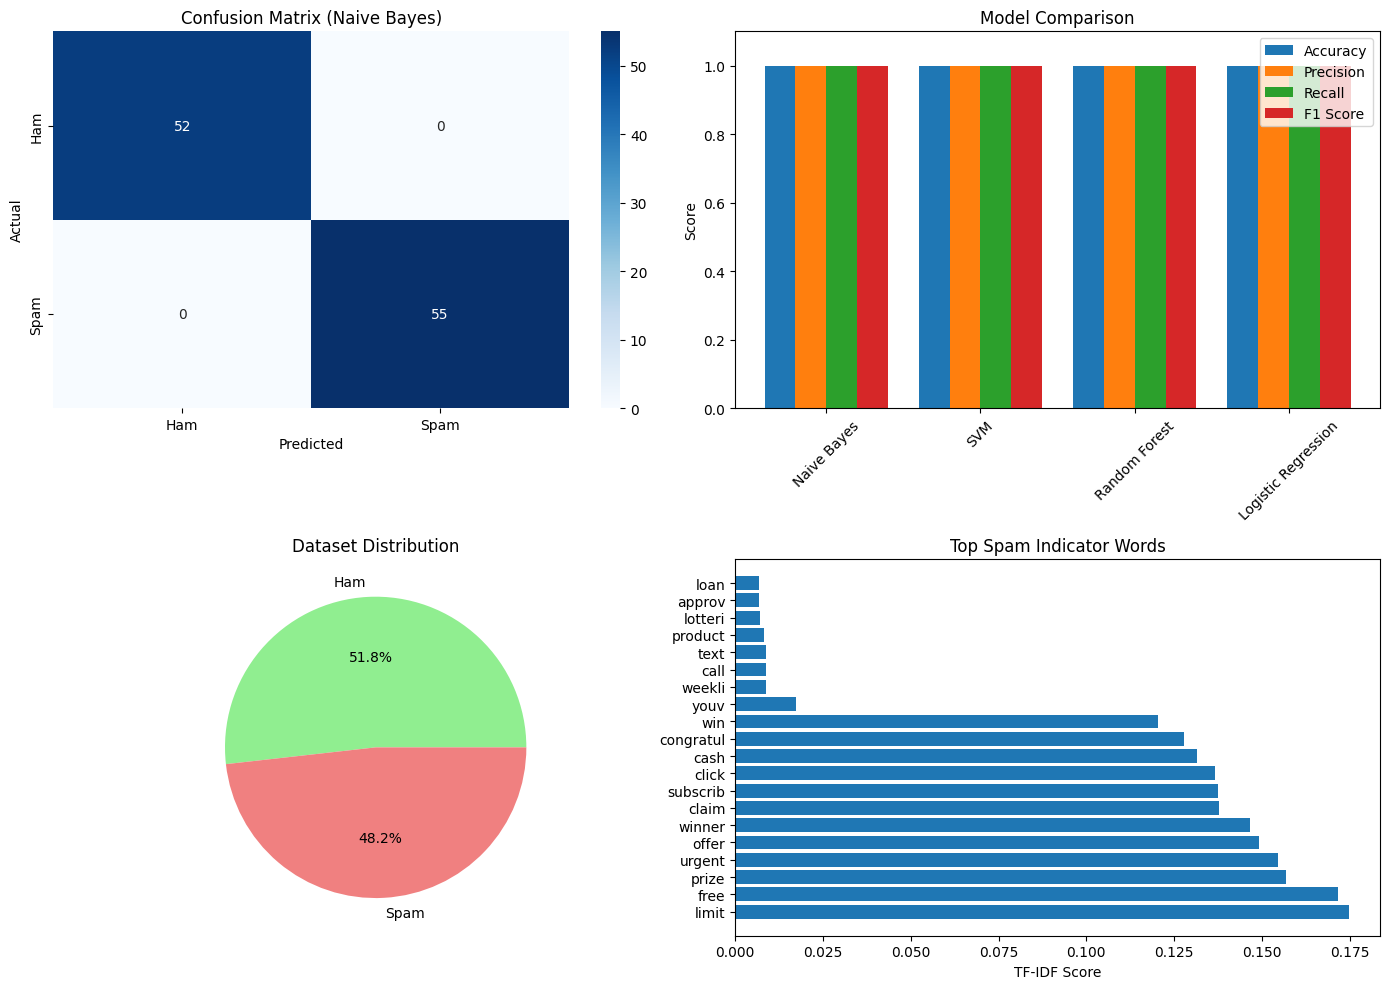


Visualization saved!


In [15]:
# ============================================
# PROJECT 5: SPAM EMAIL DETECTION
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data
nltk.download('stopwords', quiet=True)

# --------------------------
# 1. CREATE SAMPLE DATASET
# --------------------------

# Sample spam dataset
data = {
    'message': [
        # Spam messages
        "WINNER!! You have won a $1000 prize. Call now to claim!",
        "Free entry in a weekly competition to win an iPhone!",
        "Congratulations! You've been selected for a free vacation!",
        "URGENT: Your account has been compromised. Click here to verify.",
        "You have won £1000 cash! Text WIN to 12345",
        "Free ringtone! Reply to download now",
        "Get rich quick! Make $5000 weekly from home",
        "Hot singles in your area! Click to meet them now",
        "You've won a lottery prize of $500,000!",
        "Claim your free gift card worth $200",
        "Limited time offer: 90% off all products!",
        "Your loan has been approved. Call now!",
        "Win a brand new car! Enter now for free!",
        "URGENT: Payment required or legal action will be taken",
        "Congratulations winner! You've won our grand prize",
        # Ham messages
        "Hey, are you coming to the party tonight?",
        "Can we meet for lunch tomorrow?",
        "Thanks for your help with the project",
        "I'll be there in 10 minutes",
        "Don't forget to pick up groceries on your way home",
        "Happy birthday! Have a great day!",
        "The meeting has been rescheduled to 3 PM",
        "Can you send me the report by end of day?",
        "Let's catch up over coffee sometime",
        "I'm running late, start without me",
        "Great job on the presentation today!",
        "Please review the attached document",
        "What time should I pick you up?",
        "The kids are doing well at school",
        "Looking forward to seeing you this weekend",
        "Can you call me when you're free?",
        "I'll send you the details later",
        "Thanks for dinner last night, it was lovely",
        "Remember to take your medicine",
        "The package was delivered today",
    ],
    'label': [1]*15 + [0]*20  # 1 = spam, 0 = ham
}

# Expand dataset
np.random.seed(42)
expanded_data = {'message': [], 'label': []}

spam_words = ['free', 'win', 'winner', 'cash', 'prize', 'claim', 'urgent',
              'congratulations', 'offer', 'limited', 'click', 'subscribe']
ham_words = ['meeting', 'project', 'lunch', 'dinner', 'thanks', 'please',
             'tomorrow', 'today', 'work', 'home', 'call', 'time']

for _ in range(500):
    if np.random.random() > 0.5:
        # Generate spam-like message
        words = np.random.choice(spam_words, 5)
        msg = ' '.join(words) + ' ' + str(np.random.randint(100, 9999))
        expanded_data['message'].append(msg)
        expanded_data['label'].append(1)
    else:
        # Generate ham-like message
        words = np.random.choice(ham_words, 4)
        msg = ' '.join(words)
        expanded_data['message'].append(msg)
        expanded_data['label'].append(0)

# Combine original and expanded data
data['message'].extend(expanded_data['message'])
data['label'].extend(expanded_data['label'])

df = pd.DataFrame(data)
print(f"Dataset shape: {df.shape}")
print(f"\nLabel distribution:")
print(df['label'].value_counts())

# --------------------------
# 2. TEXT PREPROCESSING
# --------------------------

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Clean and preprocess text"""
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize and remove stopwords
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]

    return ' '.join(words)

# Apply preprocessing
df['processed_message'] = df['message'].apply(preprocess_text)

print("\nSample preprocessed messages:")
for i in range(3):
    print(f"Original: {df['message'].iloc[i][:50]}...")
    print(f"Processed: {df['processed_message'].iloc[i][:50]}...")
    print()

# --------------------------
# 3. FEATURE EXTRACTION
# --------------------------

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['processed_message'])
y = df['label']

print(f"Feature matrix shape: {X.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# --------------------------
# 4. BUILD & TRAIN MODELS
# --------------------------

print("\n" + "="*50)
print("MODEL TRAINING & EVALUATION")
print("="*50)

models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

results = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Cross validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'CV Mean': cv_scores.mean()
    })

    print(f"\n{name}:")
    print(f"  Accuracy:  {accuracy*100:.2f}%")
    print(f"  Precision: {precision*100:.2f}%")
    print(f"  Recall:    {recall*100:.2f}%")
    print(f"  F1 Score:  {f1*100:.2f}%")

results_df = pd.DataFrame(results)
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
print(results_df.to_string(index=False))

# --------------------------
# 5. BEST MODEL SELECTION
# --------------------------

best_model = models['Naive Bayes']  # Usually best for text classification

# --------------------------
# 6. PREDICTION FUNCTION
# --------------------------

def predict_spam(message):
    """Predict if a message is spam or not"""
    # Preprocess
    processed = preprocess_text(message)

    # Vectorize
    vectorized = tfidf_vectorizer.transform([processed])

    # Predict
    prediction = best_model.predict(vectorized)[0]
    probability = best_model.predict_proba(vectorized)[0]

    result = "SPAM" if prediction == 1 else "NOT SPAM"
    confidence = probability[prediction] * 100

    return result, confidence

# Test predictions
print("\n" + "="*50)
print("SPAM DETECTION EXAMPLES")
print("="*50)

test_messages = [
    "Congratulations! You've won a free iPhone! Click here to claim now!",
    "Hey, can we meet for coffee tomorrow at 10am?",
    "URGENT: Your bank account needs verification. Act now!",
    "Thanks for your email. I'll get back to you soon.",
    "Free entry to win $10000! Reply WIN to participate!",
    "Don't forget about mom's birthday party this weekend."
]

for msg in test_messages:
    result, confidence = predict_spam(msg)
    print(f"\nMessage: {msg[:50]}...")
    print(f"Result: {result} (Confidence: {confidence:.2f}%)")

# --------------------------
# 7. VISUALIZATION
# --------------------------

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Confusion Matrix
ax1 = axes[0, 0]
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
ax1.set_title('Confusion Matrix (Naive Bayes)')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Model Comparison
ax2 = axes[0, 1]
x = np.arange(len(results_df))
width = 0.2
ax2.bar(x - width*1.5, results_df['Accuracy'], width, label='Accuracy')
ax2.bar(x - width/2, results_df['Precision'], width, label='Precision')
ax2.bar(x + width/2, results_df['Recall'], width, label='Recall')
ax2.bar(x + width*1.5, results_df['F1 Score'], width, label='F1 Score')
ax2.set_xticks(x)
ax2.set_xticklabels(results_df['Model'], rotation=45)
ax2.set_ylabel('Score')
ax2.set_title('Model Comparison')
ax2.legend()
ax2.set_ylim(0, 1.1)

# Label Distribution
ax3 = axes[1, 0]
label_counts = df['label'].value_counts()
ax3.pie(label_counts, labels=['Ham', 'Spam'], autopct='%1.1f%%',
        colors=['lightgreen', 'lightcoral'])
ax3.set_title('Dataset Distribution')

# Word Cloud placeholder (simplified)
ax4 = axes[1, 1]
feature_names = tfidf_vectorizer.get_feature_names_out()
spam_indices = df[df['label'] == 1].index[:100]
spam_features = X[spam_indices].toarray().mean(axis=0)
top_indices = spam_features.argsort()[-20:]
top_words = [(feature_names[i], spam_features[i]) for i in top_indices]
top_words = sorted(top_words, key=lambda x: x[1], reverse=True)

words, scores = zip(*top_words)
ax4.barh(range(len(words)), scores)
ax4.set_yticks(range(len(words)))
ax4.set_yticklabels(words)
ax4.set_xlabel('TF-IDF Score')
ax4.set_title('Top Spam Indicator Words')

plt.tight_layout()
plt.savefig('spam_detection_results.png', dpi=300)
plt.show()

print("\nVisualization saved!")